# Project Definition

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import time

In [48]:
df = pd.read_csv('Train-1617360447408-1660719685476.csv')

In [49]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [50]:
len(df)

66587

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [52]:
# count the number of rows for each type
df.groupby('readmitted').size()

readmitted
0    35823
1    30764
dtype: int64

In [53]:
df['OUTPUT_LABEL'] = (df.readmitted == 1).astype('int')

In [54]:
df['OUTPUT_LABEL']

0        1
1        0
2        1
3        1
4        1
        ..
66582    0
66583    1
66584    1
66585    0
66586    1
Name: OUTPUT_LABEL, Length: 66587, dtype: int32

In [55]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [56]:
print('Prevalence:%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.462


In [57]:
print('Number of columns:',len(df.columns))

Number of columns: 50


In [58]:
df[list(df.columns)[:10]].head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17


In [59]:
df[list(df.columns)[10:20]].head()

,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5
0,1,9,1,1,4,783,403,585,585,32.970966
1,1,12,0,0,0,564,788,569,569,94.116731
2,2,24,0,0,5,574,403,585,585,64.138297
3,0,14,0,0,0,401,783,250,250,13.832428
4,1,11,0,0,0,311,276,300,300,82.898368


In [60]:
df[list(df.columns)[20:30]].head()

,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,9,None,None,No,No,No,No,No,No,No
1,6,None,None,No,No,No,No,No,No,No
2,9,None,None,No,No,No,No,No,No,No
3,7,None,Norm,No,No,No,No,No,No,No
4,9,>200,None,No,No,No,No,No,No,No


In [61]:
df[list(df.columns)[30:40]].head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,No,No,No,Steady,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No


In [62]:
df[list(df.columns)[40:]].head()

,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,OUTPUT_LABEL
0,No,No,No,No,No,No,No,Yes,1,1
1,No,No,No,No,No,No,No,No,0,0
2,Down,No,No,No,No,No,Ch,Yes,1,1
3,Down,No,No,No,No,No,Ch,Yes,1,1
4,No,No,No,No,No,No,No,No,1,1


In [63]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

index: 48911 unique values
encounter_id: 48911 unique values
patient_id: 39650 unique values
race
['Hispanic' 'Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian']
gender
['Male' 'Female' 'Unknown/Invalid']
age
['[80-90)' '[60-70)' '[50-60)' '[70-80)' '[40-50)' '[20-30)' '[30-40)'
 '[90-100)' '[0-10)' '[10-20)']
weight
['?' '[0-25)' '[75-100)' '[50-75)' '[25-50)' '[125-150)' '[150-175)'
 '[100-125)' '>200' '[175-200)']
time_in_hospital
[ 4  3  6  5  9 13  2  7  1 11 12 10 14  8]
medical_specialty: 65 unique values
num_lab_procedures: 113 unique values
num_procedures
[1 2 0 3 4 5 6]
num_medications: 71 unique values
number_outpatient: 33 unique values
number_emergency
[ 1  0  3  2  6  8  5  4 12  7 20 19  9 16 10 18 63 13 11 22 15 28 25 21
 24 46]
number_inpatient
[ 4  0  5  1  3  2  6  9  7 10  8 11 15 14 12 13 19 16 18]
diag_1: 652 unique values
diag_2: 656 unique values
diag_3: 707 unique values
diag_4: 707 unique values
diag_5: 48911 unique values
number_diagnoses
[ 9  6  7  5  4  2  8

# Feature Engineering

In [64]:
#the missing numbers were filled with a question mark. Let's replace it with a nan representation.
df = df.replace('?',np.nan)

## Numerical Features

In [65]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [66]:
#checking for null value
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

## Categorical Features

In [67]:
cols_cat=['race','gender','X1','X2','X3','X4','X5',
          'X6','X7','X8','X9','X10','X11','X12','X13','X14','X15',
          'X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','change','diabetesMed']

In [68]:
df[cols_cat].isnull().sum()

race           1504
gender            0
X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
X8                0
X9                0
X10               0
X11               0
X12               0
X13               0
X14               0
X15               0
X16               0
X17               0
X18               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X25               0
change            0
diabetesMed       0
dtype: int64

In [69]:
#race and medical_specialty have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function.
df['race'] = df['race'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')


In [70]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False).head(10)

Number medical specialty: 65


medical_specialty
UNK                           32672
InternalMedicine               9460
Emergency/Trauma               4986
Family/GeneralPractice         4924
Cardiology                     3434
Surgery-General                2067
Nephrology                     1098
Orthopedics                     912
Orthopedics-Reconstructive      812
Radiologist                     767
dtype: int64

In [71]:
top_10=['medical_specialty','UNK','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice',
        'Cardiology','Surgery-General','Nephrology',
        'Orthopedics','Orthopedics-Reconstructive','Radiologist ']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [72]:
df.groupby('med_spec').size()

med_spec
Cardiology                     3434
Emergency/Trauma               4986
Family/GeneralPractice         4924
InternalMedicine               9460
Nephrology                     1098
Orthopedics                     912
Orthopedics-Reconstructive      812
Other                          6222
Surgery-General                2067
UNK                           32672
dtype: int64

In [73]:
df_cat = pd.get_dummies(df[cols_cat  + ['med_spec']],drop_first = True)

In [74]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,X1_>300,X1_None,X1_Norm,...,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Surgery-General,med_spec_UNK
0,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df = pd.concat([df,df_cat], axis = 1)

In [76]:
cols_all_cat = list(df_cat.columns)

In [77]:
#Age and Weight are typically categorical data  in this particular dataset
df[['age', 'weight']].head()

,age,weight
0,[80-90),NaN
1,[60-70),NaN
2,[50-60),NaN
3,[70-80),NaN
4,[70-80),NaN


In [78]:
df.groupby('age').size()

age
[0-10)        100
[10-20)       428
[20-30)      1154
[30-40)      2414
[40-50)      6324
[50-60)     11378
[60-70)     14845
[70-80)     17031
[80-90)     11080
[90-100)     1833
dtype: int64

In [79]:
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

In [80]:
df.weight.notnull().sum()

2133

In [81]:
df['has_weight'] = df.weight.notnull().astype('int')

In [82]:
cols_extra = ['age_group','has_weight']

# Feature Summary

In [83]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 77
Numerical Features: 8
Categorical Features: 67
Extra features: 2


In [84]:
#cheking for whether we missed data
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital    0
X14_Steady          0
X20_Steady          0
X20_No              0
X17_Steady          0
X16_Steady          0
X15_Steady          0
X15_No              0
X14_Up              0
X14_No              0
dtype: int64

In [85]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['OUTPUT_LABEL']]

In [41]:
type(col2use)

list

In [42]:
print(cols_num)
print(cols_all_cat)
print(cols_extra)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_UNK', 'gender_Male', 'gender_Unknown/Invalid', 'X1_>300', 'X1_None', 'X1_Norm', 'X2_>8', 'X2_None', 'X2_Norm', 'X3_No', 'X3_Steady', 'X3_Up', 'X4_No', 'X4_Steady', 'X4_Up', 'X5_No', 'X5_Steady', 'X5_Up', 'X6_Steady', 'X6_Up', 'X7_No', 'X7_Steady', 'X7_Up', 'X9_No', 'X9_Steady', 'X9_Up', 'X10_No', 'X10_Steady', 'X10_Up', 'X11_Steady', 'X12_No', 'X12_Steady', 'X12_Up', 'X13_No', 'X13_Steady', 'X13_Up', 'X14_No', 'X14_Steady', 'X14_Up', 'X15_No', 'X15_Steady', 'X16_Steady', 'X17_Steady', 'X20_No', 'X20_Steady', 'X20_Up', 'X21_No', 'X21_Steady', 'X21_Up', 'X22_Steady', 'X23_Steady', 'X24_Steady', 'change_No', 'diabetesMed_Yes', 'med_spec_Emergency/Trauma', 'med_spec_Family/GeneralPractice', 'med_spec_InternalMedicine', 'med_spec_Nephrology', 'med_spec_Orthopedics

In [86]:
df_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
0,4,39,1,9,1,1,4,9,0,0,...,0,0,0,0,0,0,0,80,0,1
1,3,34,1,12,0,0,0,6,0,1,...,0,0,0,0,0,0,0,60,0,0
2,6,50,2,24,0,0,5,9,0,1,...,0,1,0,0,0,0,0,50,0,1
3,5,63,0,14,0,0,0,7,0,0,...,0,0,0,0,0,0,1,70,0,1
4,9,17,1,11,0,0,0,9,0,1,...,0,0,0,0,1,0,0,70,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,11,40,4,35,0,0,0,6,0,1,...,1,0,0,0,0,0,0,70,0,0
66583,4,39,1,7,0,0,0,9,0,1,...,0,0,0,0,0,0,1,80,0,1
66584,2,24,1,13,0,0,2,6,0,1,...,0,0,0,0,0,0,1,60,0,1
66585,4,39,1,14,0,0,0,9,0,0,...,1,0,0,0,0,0,0,80,0,0


In [ ]:
#Building Training

In [87]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [88]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [89]:
df_valid_test

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
28662,1,41,0,6,0,0,0,4,0,1,...,1,0,0,0,0,0,0,70,0,1
43806,5,51,0,14,0,0,0,7,0,1,...,0,0,0,0,0,0,1,70,0,0
40250,3,27,0,13,0,0,1,9,0,1,...,0,0,0,0,0,0,1,70,0,0
51121,1,58,2,14,0,0,0,9,0,1,...,1,0,0,0,0,0,0,40,0,1
35108,4,11,0,17,2,0,2,7,0,1,...,0,0,0,0,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,3,60,4,9,0,0,0,9,0,1,...,0,0,0,0,0,0,1,60,0,0
34931,4,90,1,23,0,0,0,6,0,0,...,0,0,0,0,0,0,1,20,0,1
29436,3,30,0,8,2,0,1,3,0,1,...,0,0,0,0,0,0,1,30,0,0
30696,4,54,1,7,0,0,2,3,0,1,...,0,0,0,0,1,0,0,30,0,1


In [90]:
#Splitting data into test and validation with 50% fraction
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [47]:
df_test

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
5633,6,58,0,7,0,0,0,6,0,0,...,1,0,0,0,0,0,0,70,0,0
33914,2,41,0,7,0,0,0,9,0,1,...,0,0,0,0,0,0,1,40,0,0
60665,7,45,1,22,0,0,2,9,0,1,...,0,0,0,0,0,0,0,80,0,0
6804,2,40,0,6,0,0,1,4,0,1,...,0,0,0,0,0,0,0,60,0,0
7337,9,83,6,45,1,0,1,9,0,1,...,1,0,0,0,0,0,0,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40949,1,2,0,5,0,0,0,2,0,1,...,0,0,0,0,0,0,1,40,0,0
42250,10,41,1,14,0,0,1,9,0,1,...,1,0,0,0,0,0,0,30,0,0
21895,6,33,1,26,2,0,0,7,0,1,...,0,0,0,0,0,1,0,70,1,0
63512,6,41,0,12,0,0,2,7,0,1,...,0,0,0,0,1,0,0,70,0,0


In [91]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [92]:
df_train_all

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
0,2,15,0,9,1,0,1,9,0,1,...,0,0,0,0,0,0,0,50,0,1
1,12,74,0,18,0,0,0,9,0,1,...,1,0,0,0,0,0,0,70,0,0
2,4,6,0,12,1,2,0,9,0,1,...,0,0,0,0,0,0,1,40,0,1
3,1,55,1,15,10,0,0,7,0,1,...,0,1,0,0,0,0,0,60,0,0
5,10,68,3,24,0,0,0,9,0,1,...,0,0,0,0,0,0,1,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,3,18,0,7,0,0,0,4,0,1,...,0,0,0,0,0,0,0,50,0,0
66583,6,69,6,39,0,0,0,9,0,1,...,0,0,0,0,1,0,0,50,0,1
66584,1,42,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,0,40,0,0
66585,11,75,6,64,0,0,0,9,0,1,...,0,0,0,0,1,0,0,60,0,0


In [93]:
df_train_all.OUTPUT_LABEL == 1

0         True
1        False
2         True
3        False
5        False
         ...  
66582    False
66583     True
66584    False
66585    False
66586    False
Name: OUTPUT_LABEL, Length: 46611, dtype: bool

In [94]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 9988):0.452
Valid prevalence(n = 9988):0.459
Train all prevalence(n = 46611):0.465


In [95]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 66587)


In [96]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 43346):0.500


In [97]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [98]:
#creating input matrix X and output vector Y
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (46611, 77)
Training shapes: (43346, 77) (43346,)
Validation shapes: (9988, 77) (9988,)


In [99]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [100]:
# save it using a package called pickle
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [101]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [102]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

In [103]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [104]:
#setting threshold at 0.5
thresh = 0.5

# comparing the performance of 7 machine learning models using default hyperparameters

# ### K nearest neighbors (KNN)

In [105]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [107]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.656
accuracy:0.613
recall:0.554
precision:0.628
specificity:0.633
prevalence:0.500
 
Validation:
AUC:0.633
accuracy:0.598
recall:0.537
precision:0.564
specificity:0.610
prevalence:0.459
 


# Logistic regression

In [108]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [109]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.660
accuracy:0.614
recall:0.536
precision:0.634
specificity:0.691
prevalence:0.500
 
Validation:
AUC:0.661
accuracy:0.622
recall:0.535
precision:0.599
specificity:0.696
prevalence:0.459
 


# Stochastic Gradient Descent

In [110]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [111]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.657
accuracy:0.610
recall:0.547
precision:0.626
specificity:0.673
prevalence:0.500
 
Validation:
AUC:0.658
accuracy:0.614
recall:0.544
precision:0.585
specificity:0.673
prevalence:0.459
 


# Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [113]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.620
accuracy:0.529
recall:0.111
precision:0.678
specificity:0.947
prevalence:0.500
 
Validation:
AUC:0.623
accuracy:0.561
recall:0.114
precision:0.620
specificity:0.941
prevalence:0.459
 


# Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [115]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.718
accuracy:0.651
recall:0.591
precision:0.672
specificity:0.710
prevalence:0.500
 
Validation:
AUC:0.664
accuracy:0.622
recall:0.555
precision:0.594
specificity:0.677
prevalence:0.459
 


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [117]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.675
accuracy:0.623
recall:0.549
precision:0.645
specificity:0.697
prevalence:0.500
 
Validation:
AUC:0.669
accuracy:0.629
recall:0.547
precision:0.606
specificity:0.699
prevalence:0.459
 


# Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [119]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.729
accuracy:0.664
recall:0.643
precision:0.671
specificity:0.685
prevalence:0.500
 
Validation:
AUC:0.683
accuracy:0.635
recall:0.619
precision:0.599
specificity:0.648
prevalence:0.459
 


# Analysing the results of above models

In [120]:
#making the dataframe of above results and plotting the graph from seaborn
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

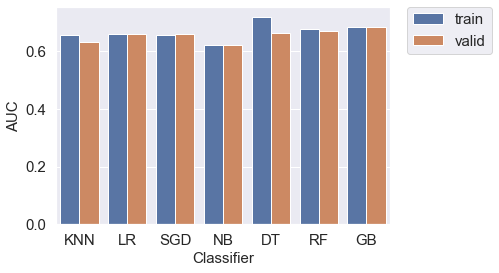

In [122]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# Model Selection: Learning Curve

In [123]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

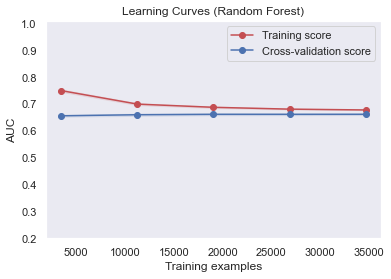

In [124]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In this case,the training and validation scores are similar but they both have low scores. This is called high bias and is a sign of underfitting.

# Model Selection: Feature Importance

# Feature Importance: Logistic regression

In [125]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [126]:
feature_importances.head()

,importance
number_inpatient,0.452419
X21_Steady,0.303143
X21_No,0.283169
number_emergency,0.183898
X13_Steady,0.181588


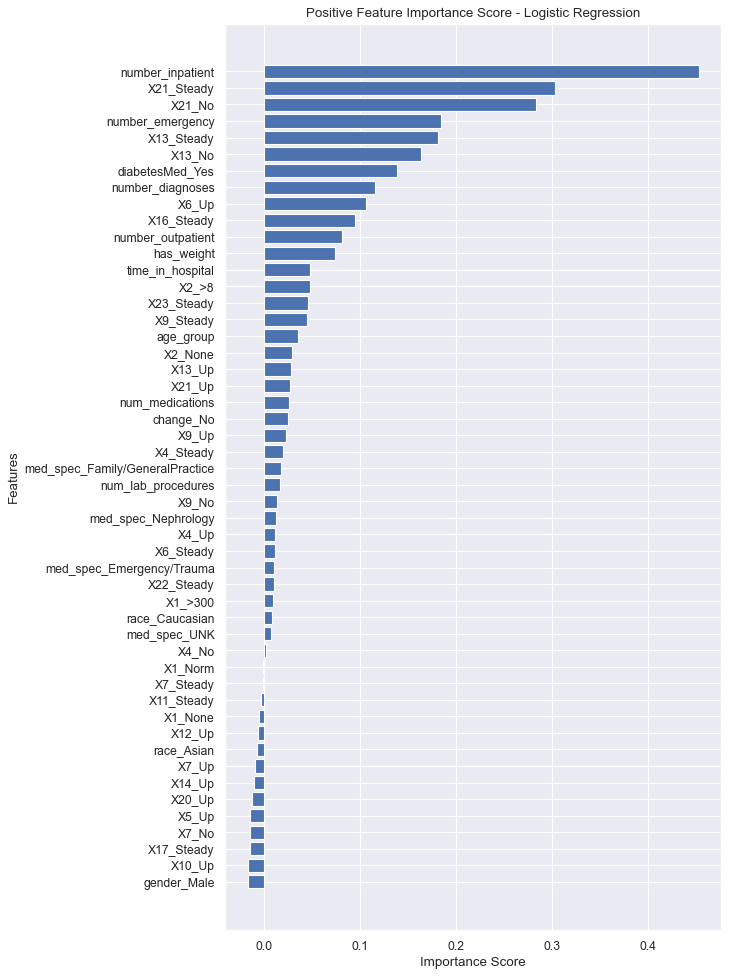

In [127]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

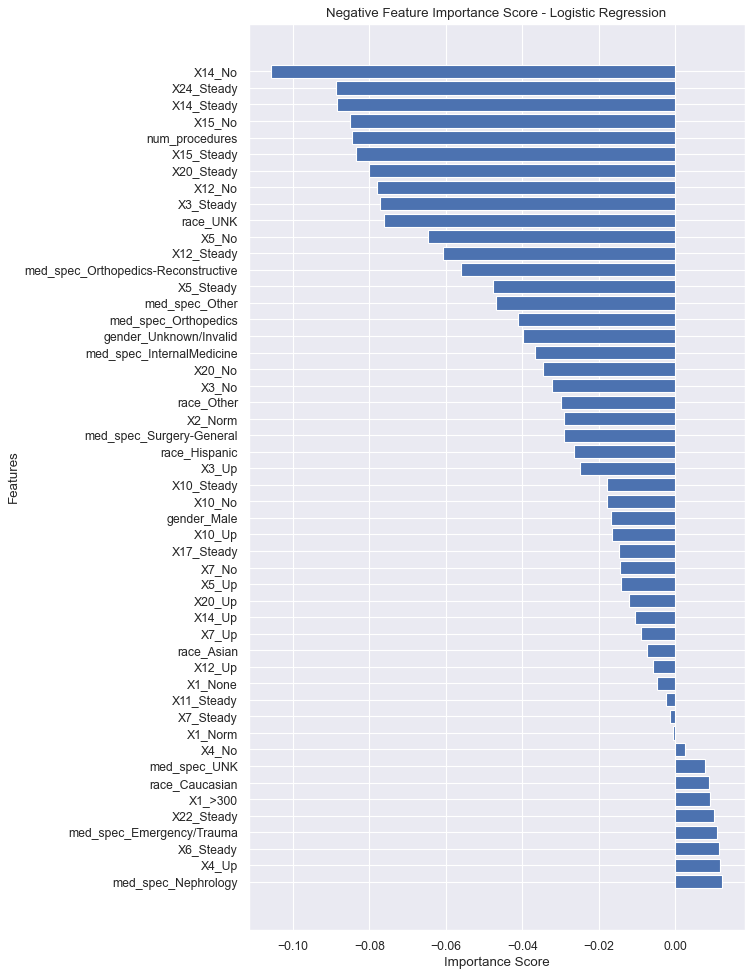

In [128]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

# Feature Importance: random forest

>In this case, the feature importance shows how often a particular feature was used to split the data.
>In this case, we don't know if a particular feature is correlated with the positive class or negative class, but rather it is just importance for making a decision.


In [129]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [130]:
feature_importances.head()

,importance
number_inpatient,0.381303
number_diagnoses,0.103440
number_emergency,0.099805
number_outpatient,0.086938
num_medications,0.048035


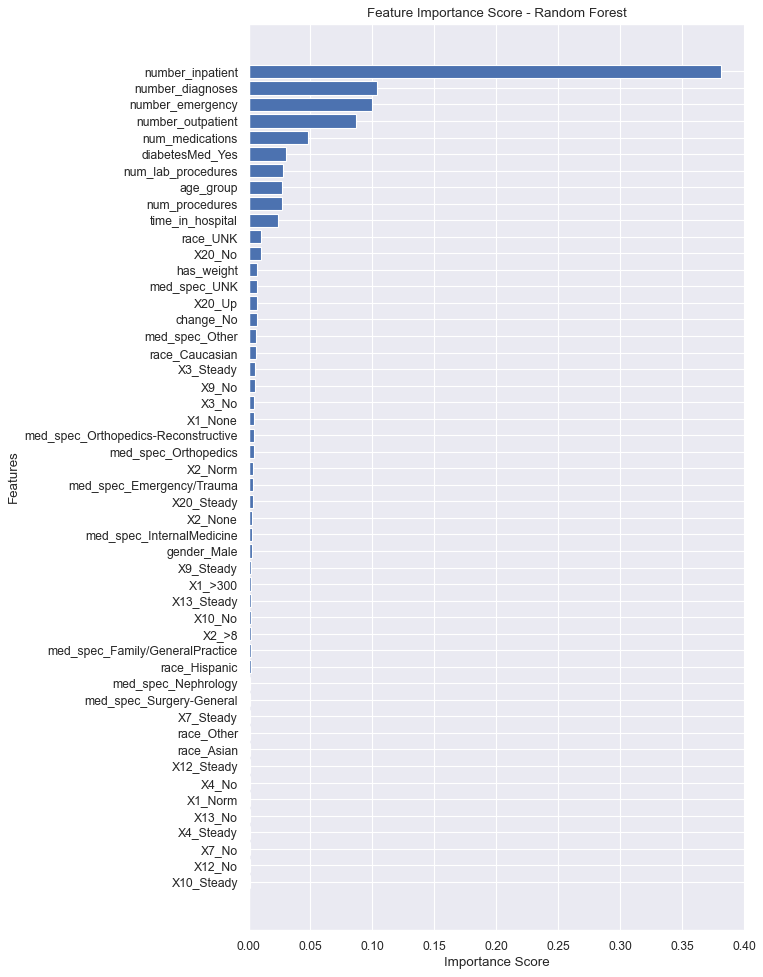

In [131]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

# Model Selection: Hyperparameter tuning

In this section, we will only optimize the hyper parameters for stochastic gradient descent, random forest and gradient boosting classifier. We will not optimize KNN since it took a while to train. We will not optimize Logistic regression since it performs similarly to stochastic gradient descent. We will not optimize decision trees since they tend to overfit and perform worse that random forests and gradient boosting classifiers.

using one technique for hyperparameter tuning is called a Grid search

In [132]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [133]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [134]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [135]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [137]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
470.8453390598297


In [138]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

# Analysing the performance of the best model compared to the baseline model

In [139]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.675
Validation AUC:0.669
Optimized Random Forest
Training AUC:0.716
Validation AUC:0.687


# Optimize stochastic gradient descent

In [140]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

C:\Users\Brunda\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Brunda\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


28.04947519302368


In [141]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 200, 'alpha': 0.001}

In [142]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.657
Validation AUC:0.658
Optimized sgdc
Training AUC:0.656
Validation AUC:0.655


# Optimize gradient boosting classifier

In [146]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

870.7248065471649


In [147]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

In [148]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.729
Validation AUC:0.683
Optimized gbc
Training AUC:0.716
Validation AUC:0.688


# Hyper parameter tuning Results

In [149]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [150]:
df_results

,classifier,data_set,auc
0,SGD,base,0.658321
1,SGD,optimized,0.655254
2,RF,base,0.669369
3,RF,optimized,0.686505
4,GB,base,0.682619
5,GB,optimized,0.687738


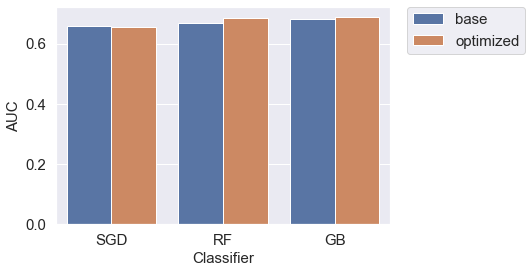

In [151]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

# Model Classifier: Best Classifier

I will choose Gradient Boosting Classifier Since it has best AUC. 

In [158]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

RandomizedSearchCV(cv=2,
                   estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        random_state=42),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': range(1, 5),
                                        'n_estimators': range(100, 500, 100)},
                   random_state=42, scoring=make_scorer(roc_auc_score))

# Model Evaluation

In [153]:
X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [198]:
out_list=[]
for i in y_test:
    out_list.append(i)
print(out_list)    

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

In [201]:
outfile = open('Y_test_out.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], out_list))
outfile.close()

In [154]:
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [155]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]


In [156]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.716
accuracy:0.654
recall:0.618
precision:0.666
specificity:0.690
prevalence:0.500
 
Validation:
AUC:0.688
accuracy:0.641
recall:0.601
precision:0.610
specificity:0.675
prevalence:0.459
 
Test:
AUC:0.683
accuracy:0.631
recall:0.590
precision:0.592
specificity:0.664
prevalence:0.452
 


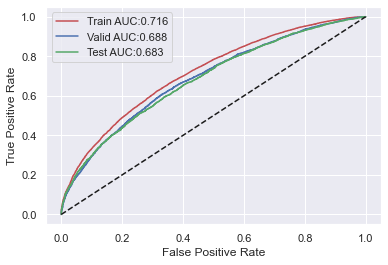

In [157]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
df['OUTPUT']

# Conclusion

Through this project, I created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital. On held out test data, our best model had an AUC of of 0.683. Using this model, we are able to catch 59% of the readmissions from our model. 